<Figure size 1400x600 with 0 Axes>

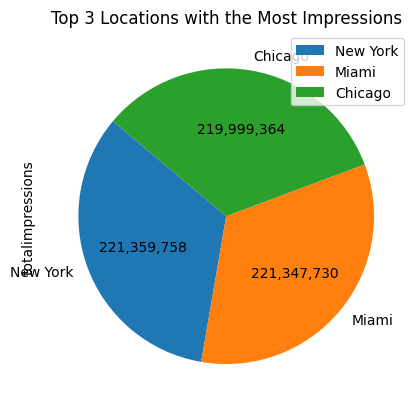

In [1]:
#Importing the necessary requirements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters
import seaborn as sns
%matplotlib inline

#Reading the csv file into a pandas dataframe

df3 = pd.read_csv('3.csv')

# Setting the height and width of the plot
plt.figure(figsize=(14, 6))

#plotting a pie plot
df3.plot.pie(
    y='totalimpressions', 
    autopct=lambda p: f'{int(p * df3["totalimpressions"].sum() / 100):,}',
    startangle=140, 
    legend=True, 
    labels=df3['location']
)

# Adding labels and titles
plt.title('Top 3 Locations with the Most Impressions​')

#adding the figure to your system
fig2 = plt.gcf()
fig2.savefig('3.png')
plt.show()

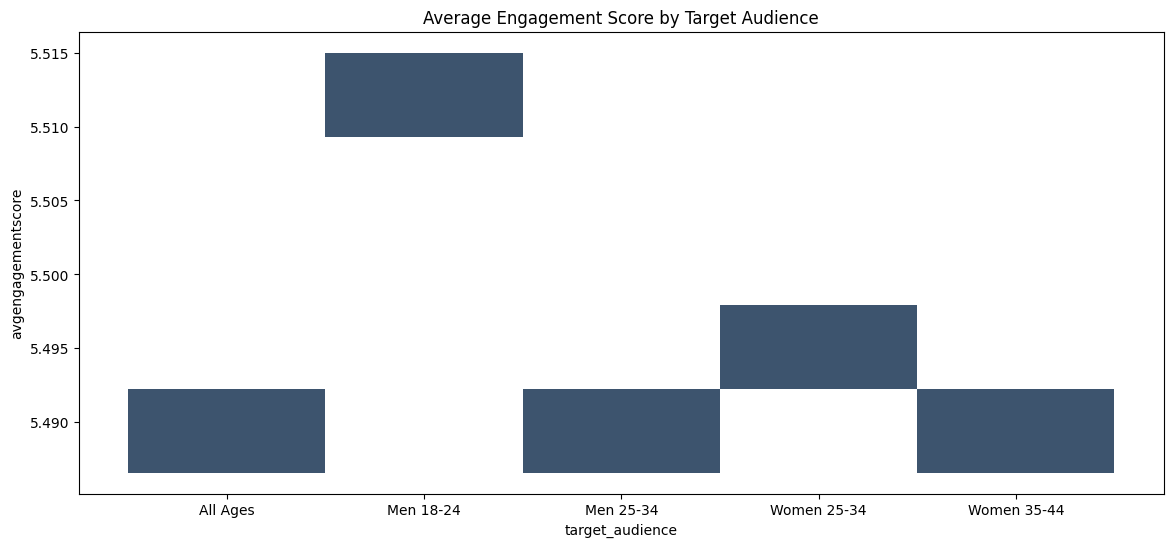

In [2]:
#Reading the csv file into a pandas dataframe

df4 = pd.read_csv('4.csv')

# Setting the height and width of the plot
plt.figure(figsize=(14, 6))

#plotting a pie plot
sns.histplot(x=df4['target_audience'], y=df4.avgengagementscore)

# Adding labels and titles
plt.title('Average Engagement Score by Target Audience​')

#adding the figure to your system
fig2 = plt.gcf()
fig2.savefig('4.png')
plt.show()

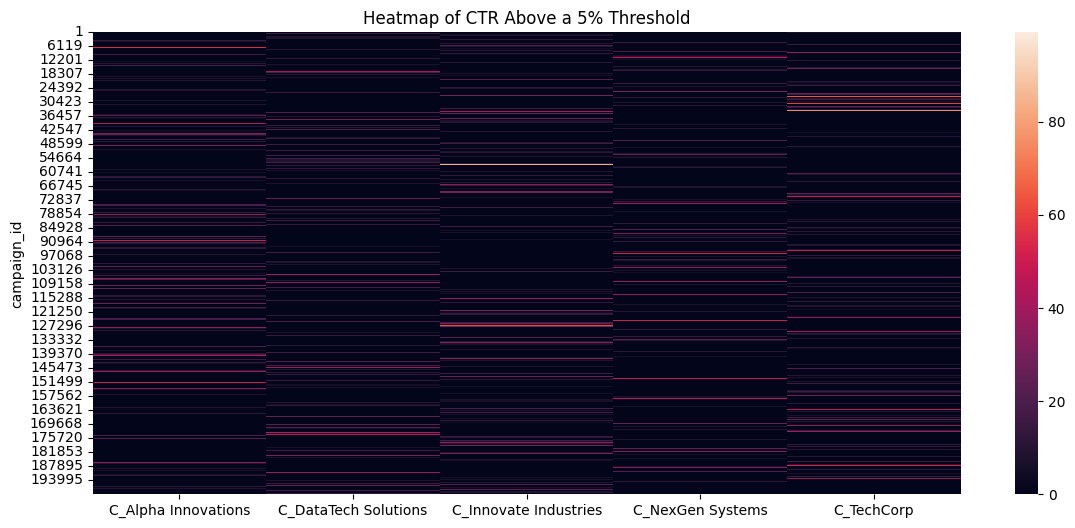

In [3]:
#Reading the csv file into a pandas dataframe

df7 = pd.read_csv('7.csv')

# Setting the height and width of the plot
plt.figure(figsize=(14, 6))

#converts the 'company' column into a set of binary (0 or 1) columns.  Each unique company becomes its own column
X_1 = pd.get_dummies(df7.company, prefix='C')

#multiplying each row of the one-hot encoded `X_1` DataFrame by the corresponding campaign's Click-Through Rate (CTR)
X_1 = X_1.mul(df7.ctr, axis=0)

#seting the index of the `X_1` DataFrame to the 'campaign_id' column from the original `df7` DataFrame
X_1.index = df7.campaign_id

#plotting a heatmap plot
sns.heatmap(X_1)

# Adding labels and titles
plt.title('Heatmap of CTR Above a 5% Threshold​')

#saving figure
fig2 = plt.gcf()
fig2.savefig('7.png')
plt.show()

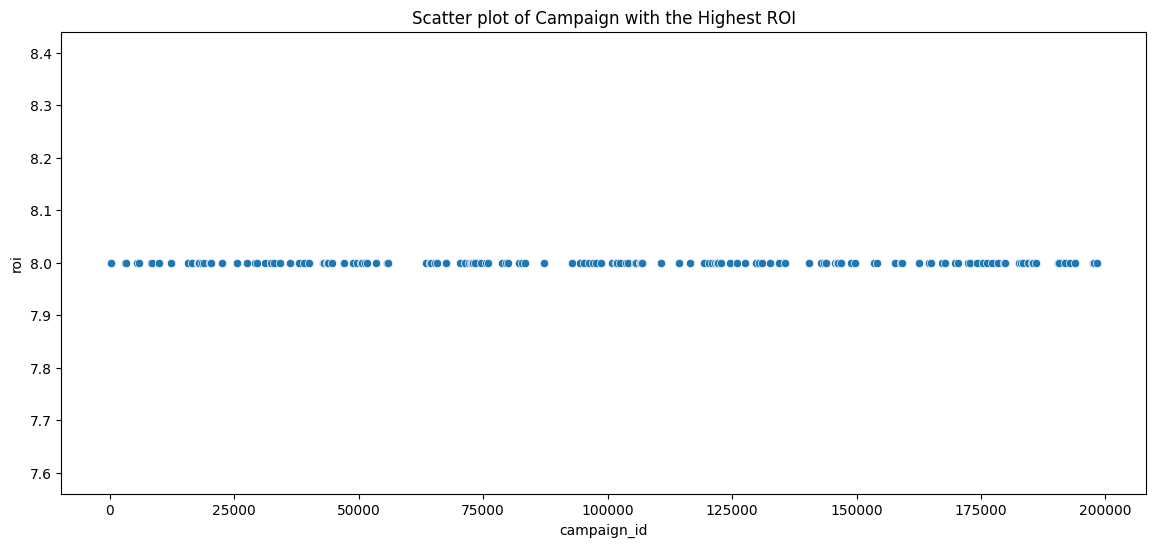

In [4]:
#Reading the csv file into a pandas dataframe

df2 = pd.read_csv('9.csv')

# Setting the height and width of the plot
plt.figure(figsize=(14, 6))

#plotting a heatmap plot
sns.scatterplot(x=df2.campaign_id, y=df2.roi)

# Adding labels and titles
plt.title('Scatter plot of Campaign with the Highest ROI')

#saving figure
fig2 = plt.gcf()
fig2.savefig('2.png')
plt.show()

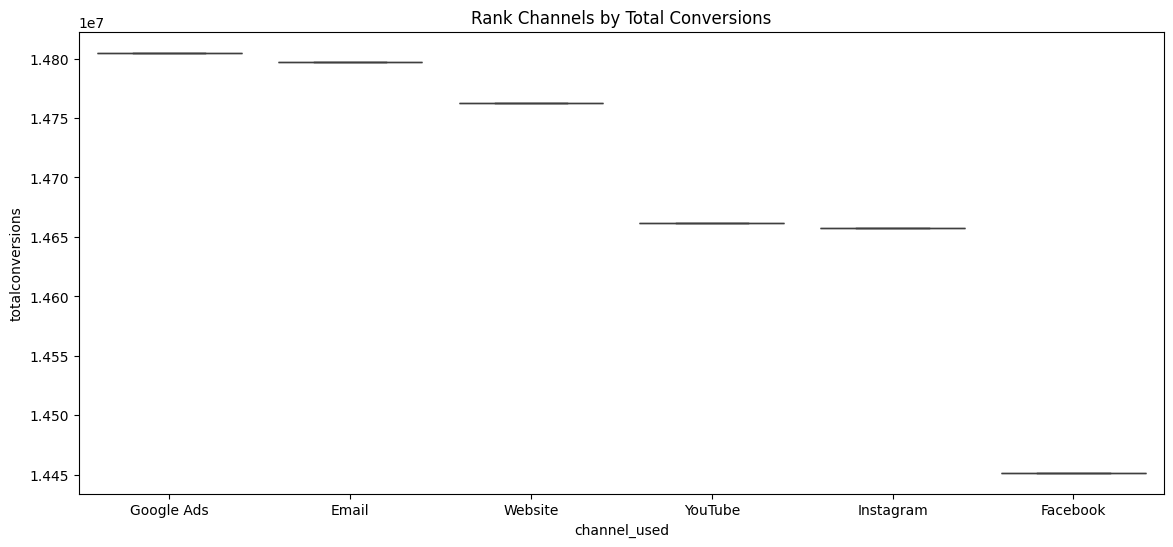

In [5]:
#Reading the csv file into a pandas dataframe

df8 = pd.read_csv('8.csv')

# Setting the height and width of the plot
plt.figure(figsize=(14, 6))

#plotting a heatmap plot
sns.boxplot(x=df8.channel_used, y=df8.totalconversions)

# Adding labels and titles
plt.title('Rank Channels by Total Conversions')

#saving figure
fig2 = plt.gcf()
fig2.savefig('8.png')
plt.show()

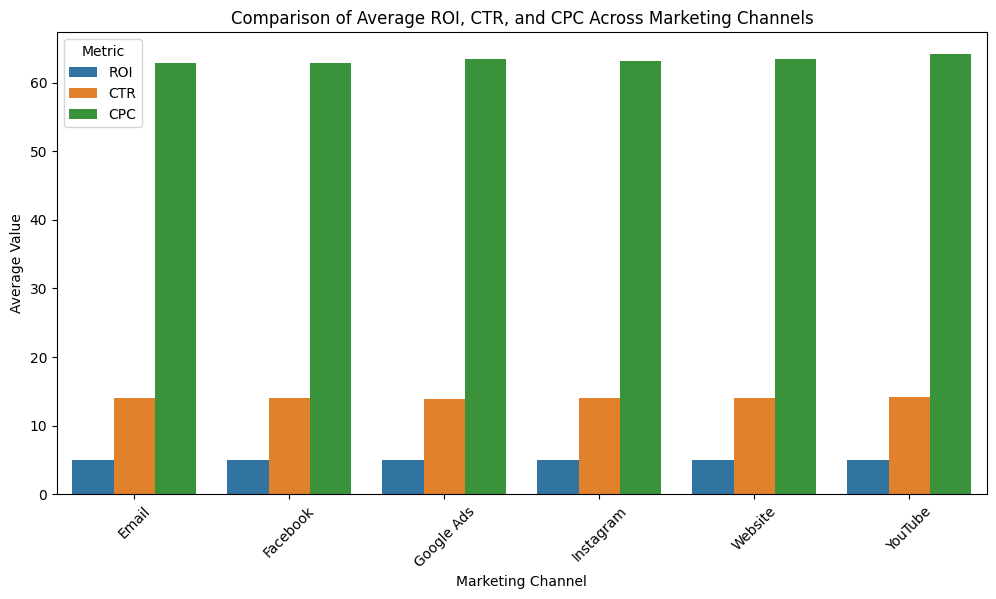

In [6]:
#Reading the csv file into a pandas dataframe

df = pd.read_csv('marketing_campaign_dataset.xlsx - marketing_campaign_dataset.csv')

#converting date object to a datetime format 
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

#converting Acquisation_cost column from object(due to $, space, and commas) to integer
df['Acquisition_Cost'] = df['Acquisition_Cost'].replace({'\$': '', ',': ''}, 
                            regex=True).str.strip().astype(np.float64).astype(np.int64)

#creating cost per conversion
df['CPC'] = df['Acquisition_Cost'] / (df['Conversion_Rate'] * df['Impressions'])

#creating click through rate
df['CTR'] = (df['Clicks'] * 100) / df['Impressions']

# Grouping the data by Channel_Used and calculating mean values for ROI, CTR, and CPC
metrics = df.groupby("Channel_Used")[["ROI", "CTR", "CPC"]].mean().reset_index()

# Reshaping the data for grouped bar plot
metrics_melted = metrics.melt(id_vars="Channel_Used", var_name="Metric", value_name="Value")

# Plotting the grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x="Channel_Used", y="Value", hue="Metric", data=metrics_melted)

# Customizing the plot
plt.xlabel("Marketing Channel")
plt.ylabel("Average Value")
plt.title("Comparison of Average ROI, CTR, and CPC Across Marketing Channels")
plt.xticks(rotation=45)
plt.legend(title="Metric")

#saving figure
fig2 = plt.gcf()
fig2.savefig('10.png')
plt.show()